In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.set_option("display.max_colwidth",200)

In [2]:
dataset = pd.read_csv('train_twitter.csv')

In [3]:
dataset

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act"


In [4]:
dataset.iloc[:5,:].values

array([[1, 0,
        ' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'],
       [2, 0,
        "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"],
       [3, 0, '  bihday your majesty'],
       [4, 0,
        '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  '],
       [5, 0, ' factsguide: society now    #motivation']], dtype=object)

In [5]:
dataset['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [6]:
# import gensim
# review_text = dataset.tweet.apply(gensim.utils.simple_preprocess)

In [7]:
#review_text
#print(dataset['tweet'])

In [8]:
testset = pd.read_csv('test_twitter.csv')
len(testset)

17197

In [9]:
df = dataset['tweet'].append(testset['tweet'], ignore_index = True)
print(df[0])

 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run


In [10]:
dataset['tweet'].shape

(31962,)

In [11]:
print(df.shape)

(49159,)


In [12]:
len(df)

49159

In [13]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
corpus = []
for i in range(0, len(df)):
  review = re.sub('[^a-zA-Z#]', ' ', df[i])
  review = review.lower()
  review = review.split()
  lemmatizer = WordNetLemmatizer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [lemmatizer.lemmatize(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
corpus

['user father dysfunctional selfish drag kid dysfunction #run',
 'user user thanks #lyft credit use cause offer wheelchair van pdx #disapointed #getthanked',
 'bihday majesty',
 '#model love u take u time ur',
 'factsguide society #motivation',
 'huge fan fare big talking leave chaos pay dispute get #allshowandnogo',
 'user camping tomorrow user user user user user user user danny',
 'next school year year exam think #school #exams #hate #imagine #actorslife #revolutionschool #girl',
 'love land #allin #cavs #champions #cleveland #clevelandcavaliers',
 'user user welcome #gr',
 '#ireland consumer price index mom climbed previous may #blog #silver #gold #forex',
 'selfish #orlando #standwithorlando #pulseshooting #orlandoshooting #biggerproblems #selfish #heabreaking #values #love #',
 'get see daddy today # day #gettingfed',
 'user #cnn call #michigan middle school build wall chant #tcot',
 'comment #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins',
 '

In [15]:
tokenized_tweet=[]
for i in range(len(corpus)):
    tokenized_tweet.append([w for w in corpus[i].split()])

In [16]:
import gensim
from gensim.test.utils import common_texts
model = gensim.models.Word2Vec(
    tokenized_tweet, vector_size=200, window=5, min_count=2,sg=1,hs =0, workers=2, negative=10, seed =34 
)

In [17]:
model.train(tokenized_tweet, total_examples=len(corpus), epochs=10)

(3422635, 4119630)

In [18]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model.wv[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary                                     
            continue
    if count != 0:
        vec /= count
    return vec

In [19]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
wordvec_df = pd.DataFrame(wordvec_arrays) 
wordvec_df.shape    

(49159, 200)

In [20]:
len(model.wv['trump'])

200

In [21]:
X = wordvec_df[:len(dataset)]
X_pred = wordvec_df[len(dataset):]

In [22]:
#pd.DataFrame(corpus)[0].str.split().str.len().value_counts()

In [23]:
### Vocabulary size
#voc_size=20000

In [24]:
#onehot_repr=[one_hot(words,voc_size)for words in corpus] 
#onehot_repr

In [25]:
#sent_length=20
#embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
#print(embedded_docs)

In [26]:
# from sklearn.feature_extraction.text import CountVectorizer
# #cv = CountVectorizer(max_features = 2000)
# from sklearn.feature_extraction.text import TfidfVectorizer
# cv = TfidfVectorizer(max_features = 2000)
# X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

In [27]:
#len(embedded_docs),y.shape

In [28]:
# X_final=np.array(embedded_docs)
# y_final=np.array(y)

In [29]:
#X_final.shape,y_final.shape

In [30]:
#dataset.iloc[:,1].value_counts()

In [31]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE()

# # fit predictor and target variable
# x_smote, y_smote = smote.fit_resample(X, y)

#from imblearn.under_sampling import NearMiss

#nm = NearMiss()

#x_nm, y_nm = nm.fit_resample(X_final,y_final)

In [32]:
#y_nm.sum()

In [33]:
#x_nm.shape, y_nm.shape

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)


In [36]:
# from sklearn.naive_bayes import GaussianNB
# classifier = GaussianNB()
# classifier.fit(X_train, y_train)

In [37]:
# from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators=100)
# classifier.fit(X_smote, y_smote)

from catboost import CatBoostClassifier
#cbc = CatBoostClassifier()
#classifier.fit(X_smote, y_smote)

In [38]:
# from sklearn.model_selection import GridSearchCV
# grid = {'max_depth': [3,4,5],'depth'         : [4,5,6,7,8,9, 10],
#                  'learning_rate' : [0.01,0.02,0.03,0.04]'n_estimators':[100, 200, 300]}

# #Instantiate GridSearchCV
# gscv = GridSearchCV (estimator = cbc, param_grid = grid, scoring ='accuracy', cv = 5, verbose =0)

# #fit the model
# gscv.fit(X_smote, y_smote)

# #returns the estimator with the best performance
# print(gscv.best_estimator_)

# #returns the best score
# print(gscv.best_score_)

# #returns the best parameters
# print(gscv.best_params_)

In [39]:
#classifier.get_params()

In [40]:
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]

In [41]:
#grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                         cv = 3, n_jobs = -1, verbose = 2)

In [42]:
classifier = CatBoostClassifier()
classifier.fit(X_smote, y_smote)

Learning rate set to 0.053551
0:	learn: 0.6449972	total: 216ms	remaining: 3m 35s
1:	learn: 0.6047958	total: 279ms	remaining: 2m 19s
2:	learn: 0.5715181	total: 339ms	remaining: 1m 52s
3:	learn: 0.5427158	total: 406ms	remaining: 1m 41s
4:	learn: 0.5139499	total: 477ms	remaining: 1m 34s
5:	learn: 0.4908488	total: 541ms	remaining: 1m 29s
6:	learn: 0.4692092	total: 607ms	remaining: 1m 26s
7:	learn: 0.4503248	total: 672ms	remaining: 1m 23s
8:	learn: 0.4315474	total: 739ms	remaining: 1m 21s
9:	learn: 0.4174598	total: 809ms	remaining: 1m 20s
10:	learn: 0.4035802	total: 880ms	remaining: 1m 19s
11:	learn: 0.3920595	total: 942ms	remaining: 1m 17s
12:	learn: 0.3814335	total: 1.01s	remaining: 1m 16s
13:	learn: 0.3723900	total: 1.07s	remaining: 1m 15s
14:	learn: 0.3627829	total: 1.15s	remaining: 1m 15s
15:	learn: 0.3544249	total: 1.21s	remaining: 1m 14s
16:	learn: 0.3466462	total: 1.27s	remaining: 1m 13s
17:	learn: 0.3397764	total: 1.33s	remaining: 1m 12s
18:	learn: 0.3334334	total: 1.39s	remaining:

162:	learn: 0.1670942	total: 10.3s	remaining: 52.9s
163:	learn: 0.1665913	total: 10.4s	remaining: 52.8s
164:	learn: 0.1661315	total: 10.4s	remaining: 52.7s
165:	learn: 0.1657045	total: 10.5s	remaining: 52.6s
166:	learn: 0.1652796	total: 10.5s	remaining: 52.6s
167:	learn: 0.1648477	total: 10.6s	remaining: 52.5s
168:	learn: 0.1643731	total: 10.7s	remaining: 52.4s
169:	learn: 0.1639008	total: 10.7s	remaining: 52.4s
170:	learn: 0.1635498	total: 10.8s	remaining: 52.3s
171:	learn: 0.1630309	total: 10.8s	remaining: 52.2s
172:	learn: 0.1625876	total: 10.9s	remaining: 52.1s
173:	learn: 0.1622752	total: 11s	remaining: 52s
174:	learn: 0.1619218	total: 11s	remaining: 52s
175:	learn: 0.1614907	total: 11.1s	remaining: 51.9s
176:	learn: 0.1611136	total: 11.2s	remaining: 51.9s
177:	learn: 0.1607266	total: 11.2s	remaining: 51.8s
178:	learn: 0.1603128	total: 11.3s	remaining: 51.7s
179:	learn: 0.1598645	total: 11.3s	remaining: 51.6s
180:	learn: 0.1594502	total: 11.4s	remaining: 51.6s
181:	learn: 0.159051

321:	learn: 0.1122741	total: 20.9s	remaining: 44.1s
322:	learn: 0.1120368	total: 21s	remaining: 44s
323:	learn: 0.1117126	total: 21.1s	remaining: 43.9s
324:	learn: 0.1114939	total: 21.1s	remaining: 43.9s
325:	learn: 0.1112213	total: 21.2s	remaining: 43.8s
326:	learn: 0.1109598	total: 21.3s	remaining: 43.8s
327:	learn: 0.1106740	total: 21.3s	remaining: 43.7s
328:	learn: 0.1104921	total: 21.4s	remaining: 43.7s
329:	learn: 0.1102255	total: 21.5s	remaining: 43.6s
330:	learn: 0.1099871	total: 21.5s	remaining: 43.5s
331:	learn: 0.1097208	total: 21.6s	remaining: 43.5s
332:	learn: 0.1094432	total: 21.7s	remaining: 43.4s
333:	learn: 0.1092074	total: 21.8s	remaining: 43.4s
334:	learn: 0.1089384	total: 21.8s	remaining: 43.3s
335:	learn: 0.1087037	total: 21.9s	remaining: 43.3s
336:	learn: 0.1083982	total: 22s	remaining: 43.2s
337:	learn: 0.1081378	total: 22s	remaining: 43.2s
338:	learn: 0.1078343	total: 22.1s	remaining: 43.1s
339:	learn: 0.1075544	total: 22.2s	remaining: 43.1s
340:	learn: 0.107287

480:	learn: 0.0784482	total: 31.8s	remaining: 34.4s
481:	learn: 0.0783026	total: 31.9s	remaining: 34.3s
482:	learn: 0.0781494	total: 32s	remaining: 34.2s
483:	learn: 0.0779711	total: 32.1s	remaining: 34.2s
484:	learn: 0.0778160	total: 32.1s	remaining: 34.1s
485:	learn: 0.0776273	total: 32.2s	remaining: 34.1s
486:	learn: 0.0774658	total: 32.3s	remaining: 34s
487:	learn: 0.0773021	total: 32.4s	remaining: 34s
488:	learn: 0.0771482	total: 32.4s	remaining: 33.9s
489:	learn: 0.0769571	total: 32.5s	remaining: 33.8s
490:	learn: 0.0767765	total: 32.6s	remaining: 33.8s
491:	learn: 0.0765887	total: 32.7s	remaining: 33.7s
492:	learn: 0.0764792	total: 32.7s	remaining: 33.7s
493:	learn: 0.0763581	total: 32.8s	remaining: 33.6s
494:	learn: 0.0761775	total: 32.9s	remaining: 33.5s
495:	learn: 0.0760029	total: 33s	remaining: 33.5s
496:	learn: 0.0758479	total: 33s	remaining: 33.4s
497:	learn: 0.0757395	total: 33.1s	remaining: 33.4s
498:	learn: 0.0756056	total: 33.2s	remaining: 33.3s
499:	learn: 0.0754485	

641:	learn: 0.0566528	total: 43.1s	remaining: 24s
642:	learn: 0.0565456	total: 43.2s	remaining: 24s
643:	learn: 0.0564271	total: 43.2s	remaining: 23.9s
644:	learn: 0.0563142	total: 43.3s	remaining: 23.8s
645:	learn: 0.0562345	total: 43.4s	remaining: 23.8s
646:	learn: 0.0560965	total: 43.4s	remaining: 23.7s
647:	learn: 0.0559655	total: 43.5s	remaining: 23.6s
648:	learn: 0.0558845	total: 43.6s	remaining: 23.6s
649:	learn: 0.0557615	total: 43.6s	remaining: 23.5s
650:	learn: 0.0556545	total: 43.7s	remaining: 23.4s
651:	learn: 0.0555373	total: 43.8s	remaining: 23.4s
652:	learn: 0.0554796	total: 43.8s	remaining: 23.3s
653:	learn: 0.0554062	total: 43.9s	remaining: 23.2s
654:	learn: 0.0553068	total: 44s	remaining: 23.2s
655:	learn: 0.0552429	total: 44s	remaining: 23.1s
656:	learn: 0.0551669	total: 44.1s	remaining: 23s
657:	learn: 0.0550570	total: 44.1s	remaining: 22.9s
658:	learn: 0.0549459	total: 44.2s	remaining: 22.9s
659:	learn: 0.0548204	total: 44.3s	remaining: 22.8s
660:	learn: 0.0547144	

803:	learn: 0.0421494	total: 54.3s	remaining: 13.2s
804:	learn: 0.0420660	total: 54.4s	remaining: 13.2s
805:	learn: 0.0419863	total: 54.5s	remaining: 13.1s
806:	learn: 0.0419088	total: 54.5s	remaining: 13s
807:	learn: 0.0418170	total: 54.6s	remaining: 13s
808:	learn: 0.0417455	total: 54.7s	remaining: 12.9s
809:	learn: 0.0416850	total: 54.7s	remaining: 12.8s
810:	learn: 0.0416237	total: 54.8s	remaining: 12.8s
811:	learn: 0.0415566	total: 54.9s	remaining: 12.7s
812:	learn: 0.0415164	total: 54.9s	remaining: 12.6s
813:	learn: 0.0414190	total: 55s	remaining: 12.6s
814:	learn: 0.0413382	total: 55.1s	remaining: 12.5s
815:	learn: 0.0412619	total: 55.1s	remaining: 12.4s
816:	learn: 0.0411668	total: 55.2s	remaining: 12.4s
817:	learn: 0.0410809	total: 55.3s	remaining: 12.3s
818:	learn: 0.0410209	total: 55.3s	remaining: 12.2s
819:	learn: 0.0409430	total: 55.4s	remaining: 12.2s
820:	learn: 0.0408553	total: 55.5s	remaining: 12.1s
821:	learn: 0.0407745	total: 55.5s	remaining: 12s
822:	learn: 0.040697

965:	learn: 0.0314175	total: 1m 5s	remaining: 2.29s
966:	learn: 0.0313618	total: 1m 5s	remaining: 2.23s
967:	learn: 0.0313042	total: 1m 5s	remaining: 2.16s
968:	learn: 0.0312377	total: 1m 5s	remaining: 2.09s
969:	learn: 0.0311724	total: 1m 5s	remaining: 2.03s
970:	learn: 0.0311087	total: 1m 5s	remaining: 1.96s
971:	learn: 0.0310438	total: 1m 5s	remaining: 1.89s
972:	learn: 0.0309912	total: 1m 5s	remaining: 1.82s
973:	learn: 0.0309432	total: 1m 5s	remaining: 1.76s
974:	learn: 0.0308751	total: 1m 5s	remaining: 1.69s
975:	learn: 0.0308144	total: 1m 5s	remaining: 1.62s
976:	learn: 0.0307538	total: 1m 6s	remaining: 1.55s
977:	learn: 0.0306982	total: 1m 6s	remaining: 1.49s
978:	learn: 0.0306436	total: 1m 6s	remaining: 1.42s
979:	learn: 0.0305796	total: 1m 6s	remaining: 1.35s
980:	learn: 0.0305262	total: 1m 6s	remaining: 1.28s
981:	learn: 0.0304829	total: 1m 6s	remaining: 1.22s
982:	learn: 0.0304242	total: 1m 6s	remaining: 1.15s
983:	learn: 0.0303549	total: 1m 6s	remaining: 1.08s
984:	learn: 

In [43]:
print(classifier.get_all_params())

{'nan_mode': 'Min', 'eval_metric': 'Logloss', 'iterations': 1000, 'sampling_frequency': 'PerTree', 'leaf_estimation_method': 'Newton', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': False, 'model_size_reg': 0.5, 'pool_metainfo_options': {'tags': {}}, 'subsample': 0.800000011920929, 'use_best_model': False, 'class_names': [0, 1], 'random_seed': 0, 'depth': 6, 'posterior_sampling': False, 'border_count': 254, 'classes_count': 0, 'auto_class_weights': 'None', 'sparse_features_conflict_fraction': 0, 'leaf_estimation_backtracking': 'AnyImprovement', 'best_model_min_trees': 1, 'model_shrink_rate': 0, 'min_data_in_leaf': 1, 'loss_function': 'Logloss', 'learning_rate': 0.053550999611616135, 'score_function': 'Cosine', 'task_type': 'CPU', 'leaf_estimation_iterations': 10,

In [44]:
y_pred = classifier.predict(X_test)

In [45]:
y_pred.sum() , len(y_pred)


(518, 6393)

In [46]:
# from catboost import CatBoostClassifier
# clf = CatBoostClassifier()
# clf.fit(X_train, y_train)


In [47]:
#y_pred = clf.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5760  225]
 [ 115  293]]


0.9468168309088065

In [49]:
f1_score(y_test, y_pred)

0.6328293736501079

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5985
           1       0.57      0.72      0.63       408

    accuracy                           0.95      6393
   macro avg       0.77      0.84      0.80      6393
weighted avg       0.95      0.95      0.95      6393



In [51]:
y_eval = classifier.predict(X_train)
#y_eval = np.round(y_eval).astype(int)

In [52]:
f1_score(y_train,y_eval)

0.9708222811671087

In [53]:
print(classification_report(y_train,y_eval))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23735
           1       0.95      1.00      0.97      1834

    accuracy                           1.00     25569
   macro avg       0.97      1.00      0.98     25569
weighted avg       1.00      1.00      1.00     25569



In [54]:
# import re
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# from nltk.stem import WordNetLemmatizer
# corpus = []
# for i in range(0, len(testset)):
#   review = re.sub('[^a-zA-Z]', ' ', testset['tweet'][i])
#   review = review.lower()
#   review = review.split()
#   lemmatizer = WordNetLemmatizer()
#   all_stopwords = stopwords.words('english')
#   all_stopwords.remove('not')
#   review = [lemmatizer.lemmatize(word) for word in review if not word in set(all_stopwords)]
#   review = ' '.join(review)
#   corpus.append(review)

In [55]:
#onehot_repr=[one_hot(words,voc_size)for words in corpus] 

In [56]:
#embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)

In [57]:
# X_pred=np.array(embedded_docs)
# Y_pred=model.predict(X_pred)
# Y_pred = np.round(Y_pred).astype(int)

In [58]:
#X_pred = cv.transform(corpus).toarray()
Y_pred=classifier.predict(X_pred)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

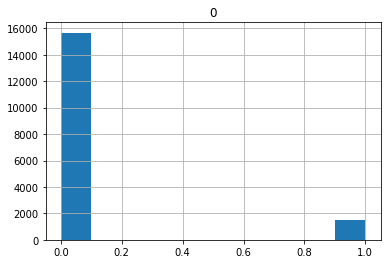

In [59]:
pd.DataFrame(Y_pred).hist()

In [60]:
#from sklearn.feature_extraction.text import CountVectorizer
#cv1 = CountVectorizer(max_features = 1500)
#X_pred = cv.transform(corpus).toarray()

In [61]:
#Y_pred = clf.predict(X_pred)
Y_pred = np.reshape(Y_pred,(-1,1))
print(Y_pred.shape)

(17197, 1)


In [62]:
numpy_array = np.concatenate((testset.iloc[:,[0]].values,Y_pred),axis=1)
df2 = pd.DataFrame(numpy_array, columns =['id','label'])
df2.to_csv('Output_twitter.csv',index=False)
print(df2)

          id  label
0      31963      0
1      31964      0
2      31965      0
3      31966      0
4      31967      0
...      ...    ...
17192  49155      1
17193  49156      0
17194  49157      1
17195  49158      0
17196  49159      0

[17197 rows x 2 columns]
